## Observations and Insights 

1. Mouse numbers used for the trial are close to equal for every treamtment.  Before the idently of the duplicate mouse, 249 mice were listed in the mouse metedata.  9 treamtments have exactly 10 mice assigned to each drug regimen.  But one treatment only used 9 mice.  After the mouse with the duplicated results was removed, 2 Treamtments only used 9 mice.

2. The gender of mice used for the trial was evenly spread between male and female.  Note: No analysis was completed on the gender spread for each treatment.

3. Capomulin and Ramicane performed better that any other treatments including two others of interest (Infubinol and Ceftamin).  Note: More results were recorded for the treatments of Capomulin and Ramicane. Out of the four treatments of interest, only one recorded outlier was found (in the Infubinol treatment).  Also, a random selected mouse on the Capomulin regimen showed very good results in the reduction of tumor volume.

4. The correlation coefficient calculation shows a high correlation between mouse weight and tumor volume size.  The linear regression model concludes that heavier mice will tend to have larger tumors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for previewo
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()


249

249 Unique mice in the results

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


5 timepoint results have been observed as duplicate for Mouse 'g989'.  The table below confirms this for timepoints 0, 5, 10, 15 and 20

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results[mouse_results != 'g989']
mouse_results_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean['Mouse ID'].nunique()

248

248 Unique mice in the results, this is 1 less mouse than before removing the duplicate records.  Data is now clean.

In [7]:
## Summary Statistics


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
avg_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=1)
sd_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=1)
sem_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_mouse_df = pd.DataFrame({'Mean':avg_tumor_vol, 'Median': med_tumor_vol, 'Variance': var_tumor_vol,'StDev':sd_tumor_vol, 'SEM':sem_tumor_vol})

summary_mouse_df


,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_mouse_other = mouse_results_clean.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])

summary_mouse_other = summary_mouse_other['Tumor Volume (mm3)']
summary_mouse_other 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

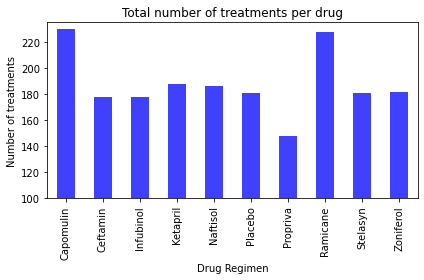

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Obtain data for bar graphs
mouse_groupby = mouse_results_clean.groupby(['Drug Regimen'])
mouse_bar_df = pd.DataFrame(mouse_groupby['Mouse ID'].count())

# Plot the results
mouse_bar_df.plot(kind="bar", facecolor="blue", alpha=0.75, legend=False)
plt.title("Total number of treatments per drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of treatments")
plt.ylim(100, mouse_groupby['Mouse ID'].count().max() + 5)
plt.tight_layout()

plt.show()

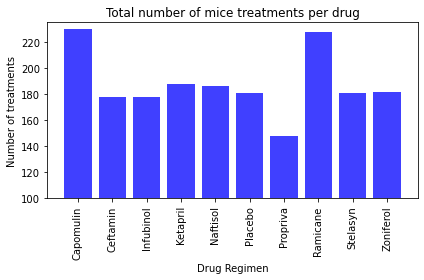

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Obtain data for bar graphs
mouse_groupby = mouse_results_clean.groupby(['Drug Regimen'])
treatment = pd.DataFrame(mouse_groupby['Mouse ID'].count().reset_index())

# Plot the results
x_axis = np.arange(0, len(treatment), 1)
plt.bar(x_axis, treatment['Mouse ID'], color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment['Drug Regimen'], rotation='vertical')
plt.ylim(100, max(treatment['Mouse ID'])+5)
plt.title("Total number of mice treatments per drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of treatments")
plt.tight_layout()

plt.show()


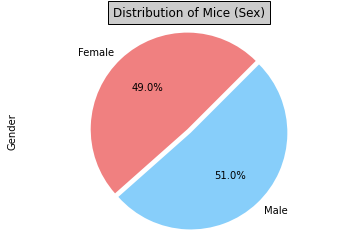

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_groupby = mouse_results_clean.groupby('Sex')
mouse_gender_df = mouse_gender_groupby['Mouse ID'].count()
gender_list = mouse_gender_df.keys().sort_values('Sex')

colours = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
mouse_gender_pie = mouse_gender_df.plot(kind="pie", y=gender_list, autopct="%1.1f%%",startangle=45, explode=explode, colors=colours)
mouse_gender_pie.set_ylabel("Gender")
mouse_gender_pie.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})

plt.axis("equal")
plt.show();


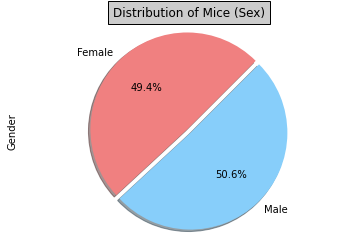

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_results_clean['Sex'].value_counts().reset_index().sort_values('Sex')

colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(mouse_gender['Sex'], explode=explode, labels=mouse_gender['index'], autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})
ax1.set_ylabel("Gender")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_results_latest = mouse_results_clean.loc[mouse_results_clean.groupby('Mouse ID')['Timepoint'].idxmax()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_results_latest = mouse_results_latest[mouse_results_latest['Drug Regimen'].isin( ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

mouse_results_latest[:10]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25
1857,a520,45,38.810366,1,Ramicane,Male,13,21
1371,a577,30,57.031862,2,Infubinol,Female,6,25
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1794,a685,45,66.083066,3,Infubinol,Male,8,30
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = [] 
for treatment in mouse_results_latest['Drug Regimen'].unique():
    treatment_list.append(treatment)

# Create empty list to fill with tumor vol data (for plotting)
treatment_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = mouse_results_latest.loc[mouse_results_latest["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset  
    treatment_vol_data.append(tumor_vol_data)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"Quartiles and Outlier Information for {treatment}")
    print("-----------------------------------------------------")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")  
    print()


Quartiles and Outlier Information for Infubinol
-----------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Quartiles and Outlier Information for Ceftamin
-----------------------------------------------------
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.

Quartiles and Outlier Information for Ramicane
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
T

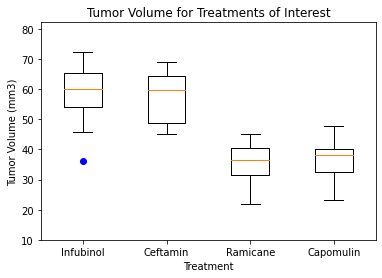

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Treatments of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(10, max(treatment_vol_data[0]) + 10) 
ax1.set_xlabel('Treatment')
ax1.set_xticklabels(treatment_list)
ax1.boxplot(treatment_vol_data, sym='bo')
plt.show()

## Line and Scatter Plots

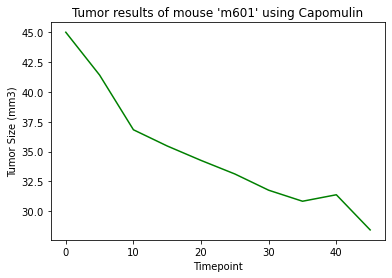

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse = mouse_results_clean.loc[(mouse_results_clean['Mouse ID'] == 'm601')]
mouse = selected_mouse.iloc[1,0]
treatment = selected_mouse.iloc[1,4]

plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], color="green")

plt.title(f"Tumor results of mouse '{mouse}' using {treatment}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size (mm3)")

# Print our chart to the screen
plt.show()

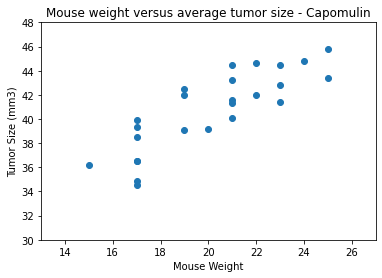

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_mouse_treatment = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Capomulin')]
tumor_size = selected_mouse_treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = selected_mouse_treatment.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, tumor_size)
plt.title('Mouse weight versus average tumor size - Capomulin')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm3)')
plt.xlim(13,27)
plt.ylim(30,48)
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor size factors is 0.84



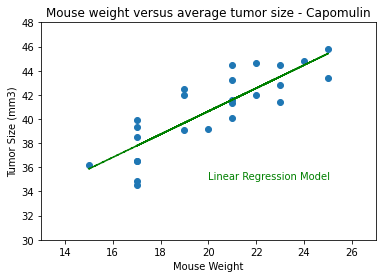

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_size)
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_weight, tumor_size)
m_fit = m_slope * mouse_weight + m_int

print(f"The correlation between mouse weight and tumor size factors is {round(correlation[0],2)}")
print()

plt.scatter(mouse_weight, tumor_size)
plt.plot(mouse_weight,m_fit,"--",color='g')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm3)')
plt.title('Mouse weight versus average tumor size - Capomulin')
plt.xlim(13,27)
plt.ylim(30,48)
plt.text(20,35,'Linear Regression Model', color='g')
plt.show()